In [36]:
### Importing requred projects

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
#fromsklearn.linear_model import SGDClassifer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [37]:
# Load dataset
wine = pd.read_csv('winequality-red.csv', sep=';')

In [38]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Pre-processing data

In [39]:
wine['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [40]:
bins = (2, 6.5, 9)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins=bins, labels=group_names)
wine['quality'].value_counts()

bad     3838
good    1060
Name: quality, dtype: int64

In [41]:
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])

<AxesSubplot:xlabel='quality', ylabel='count'>

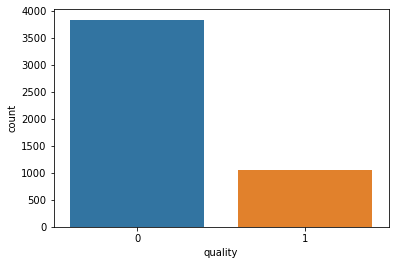

In [42]:
sns.countplot(data=wine, x='quality')

In [43]:
wine.quality.value_counts()

0    3838
1    1060
Name: quality, dtype: int64

In [44]:
# Seperate the dataset as response variable and feature variables
X = wine.drop('quality', axis=1)
y = wine['quality']

In [45]:
# Train and test splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Random Forest Classifier

In [55]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [56]:
pred_rfc[:20]

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [58]:
# Lets see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       753
           1       0.85      0.65      0.74       227

    accuracy                           0.89       980
   macro avg       0.88      0.81      0.83       980
weighted avg       0.89      0.89      0.89       980



In [59]:
print(confusion_matrix(y_test, pred_rfc))

[[727  26]
 [ 80 147]]


## SVM Classifier

In [60]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [64]:
# Lets see how our model performed
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89       753
           1       0.75      0.34      0.47       227

    accuracy                           0.82       980
   macro avg       0.79      0.65      0.68       980
weighted avg       0.81      0.82      0.79       980

[[728  25]
 [150  77]]


# Neural Network

In [63]:
mlpc=MLPClassifier(hidden_layer_sizes=(11,11,11), max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [65]:
# Lets see how our model performed
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       753
           1       0.62      0.43      0.51       227

    accuracy                           0.81       980
   macro avg       0.73      0.67      0.69       980
weighted avg       0.79      0.81      0.79       980

[[694  59]
 [130  97]]
